# Deadly Visualizations!!!

![Image](../images/viz_types_portada.png)

## Setup

First we need to create a basic setup which includes:

- Importing the libraries.

- Reading the dataset file (source [Instituto Nacional de Estadística](https://www.ine.es/ss/Satellite?L=es_ES&c=Page&cid=1259942408928&p=1259942408928&pagename=ProductosYServicios%2FPYSLayout)).

- Create a couple of columns and tables for the analysis.

__NOTE:__ some functions were already created in order to help you go through the challenge. However, feel free to perform any code you might need.

In [1]:
# some imports

import sys
sys.path.insert(0, "../modules")
import pandas as pd
import cufflinks as cf
import plotly.express as px
import re
import module as mod # functions are include in module.py.
cf.go_offline()

In [72]:
# read dataset

deaths = pd.read_csv('../data/7947.csv', sep=';', thousands='.')

deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301158 entries, 0 to 301157
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Causa de muerte  301158 non-null  object
 1   Sexo             301158 non-null  object
 2   Edad             301158 non-null  object
 3   Periodo          301158 non-null  int64 
 4   Total            301158 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


In [73]:
# add some columns...you'll need them later

deaths['cause_code'] = deaths['Causa de muerte'].apply(mod.cause_code)
deaths['cause_group'] = deaths['Causa de muerte'].apply(mod.cause_types)
deaths['cause_name'] = deaths['Causa de muerte'].apply(mod.cause_name)

deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301158 entries, 0 to 301157
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Causa de muerte  301158 non-null  object
 1   Sexo             301158 non-null  object
 2   Edad             301158 non-null  object
 3   Periodo          301158 non-null  int64 
 4   Total            301158 non-null  int64 
 5   cause_code       301158 non-null  object
 6   cause_group      301158 non-null  object
 7   cause_name       301158 non-null  object
dtypes: int64(2), object(6)
memory usage: 18.4+ MB


In [74]:
# lets check the categorical variables

var_list = ['Sexo', 'Edad', 'Periodo', 'cause_code', 'cause_name', 'cause_group']

categories = mod.cat_var(deaths, var_list)
categories

,categorical_variable,number_of_possible_values,values
0,cause_code,117,"[001-102, 001-008, 001, 002, 003, 004, 005, 00..."
1,cause_name,117,"[I-XXII.Todas las causas, I.Enfermedades infec..."
2,Periodo,39,"[2018, 2017, 2016, 2015, 2014, 2013, 2012, 201..."
3,Edad,22,"[Todas las edades, Menos de 1 año, De 1 a 4 añ..."
4,Sexo,3,"[Total, Hombres, Mujeres]"
5,cause_group,2,"[Multiple causes, Single cause]"


In [116]:
deaths_single_cause = deaths[deaths['cause_group'] == 'Single cause'].reset_index(drop=True)
deaths_single_cause = deaths_single_cause[deaths_single_cause['Edad'] == 'Todas las edades'].reset_index(drop=True)
deaths_single_cause = deaths_single_cause[deaths_single_cause['Sexo'] == 'Total'].reset_index(drop=True)
deaths_multiple_causes = deaths[deaths['cause_group'] == 'Multiple causes'].reset_index(drop=True)
deaths_multiple_causes = deaths_multiple_causes[deaths_multiple_causes['Edad'] == 'Todas las edades'].reset_index(drop=True)
deaths_multiple_causes = deaths_multiple_causes[deaths_multiple_causes['Sexo'] == 'Total'].reset_index(drop=True)

In [117]:
# we need also to create a causes table for the analysis

causes_table = deaths[['cause_code', 'cause_name', 'cause_group']].drop_duplicates().sort_values(by='cause_code').reset_index(drop=True)

causes_table

,cause_code,cause_name,cause_group
0,001,Enfermedades infecciosas intestinales,Single cause
1,001-008,I.Enfermedades infecciosas y parasitarias,Multiple causes
2,001-102,I-XXII.Todas las causas,Multiple causes
3,002,Tuberculosis y sus efectos tardíos,Single cause
4,003,Enfermedad meningocócica,Single cause
5,004,Septicemia,Single cause
6,005,Hepatitis vírica,Single cause
7,006,SIDA,Single cause
8,007,"VIH+ (portador, evidencias de laboratorio del ...",Single cause
9,008,Resto de enfermedades infecciosas y parasitari...,Single cause


In [118]:
pd.set_option('display.max_rows', None)

In [119]:
# And some space for free-style Pandas!!! (e.g.: df['column_name'].unique())
'''
Only Single Cause deaths selected above! 
'''

'\nOnly Single Cause deaths selected above! \n'

In [120]:
grouped_deaths = deaths_multiple_causes.pivot_table(index='cause_name', aggfunc='sum').drop('Periodo',axis=1)
grouped_deaths

,Total
cause_name,
I-XXII.Todas las causas,13913608
I.Enfermedades infecciosas y parasitarias,246243
II.Tumores,3559432
"III.Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan al mecanismo de la inmunidad",49284
"IV.Enfermedades endocrinas, nutricionales y metabólicas",433540
IX.Enfermedades del sistema circulatorio,4901487
V.Trastornos mentales y del comportamiento,402868
VI-VIII.Enfermedades del sistema nervioso y de los órganos de los sentidos,458060
X.Enfermedades del sistema respiratorio,1485807


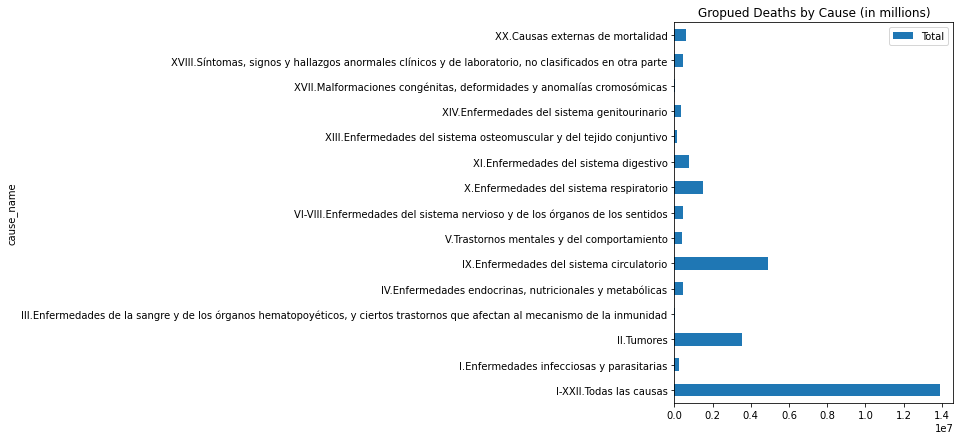

In [121]:
grouped_deaths_plot = grouped_deaths.plot(y='Total',kind='barh', figsize=(5,7), title='Gropued Deaths by Cause (in millions)')

## Lets make some transformations

Eventhough the dataset is pretty clean, the information is completely denormalized as you could see. For that matter a collection of methods (functions) are available in order to generate the tables you might need:

- `row_filter(df, cat_var, cat_values)` => Filter rows by any value or group of values in a categorical variable.

- `nrow_filter(df, cat_var, cat_values)` => The same but backwards. 

- `groupby_sum(df, group_vars, agg_var='Total', sort_var='Total')` => Add deaths by a certain variable.

- `pivot_table(df, col, x_axis, value='Total')`=> Make some pivot tables, you might need them...

__NOTE:__ be aware that the filtering methods can perform a filter at a time. Feel free to perform the filter you need in any way you want or feel confortable with.

In [122]:
# Example 1
'''
dataset = mod.row_filter(deaths, 'Sexo', ['Total'])
dataset = mod.row_filter(dataset, 'Edad', ['Todas las edades'])
dataset.head()
'''

"\ndataset = mod.row_filter(deaths, 'Sexo', ['Total'])\ndataset = mod.row_filter(dataset, 'Edad', ['Todas las edades'])\ndataset.head()\n"

In [123]:
evolution_deaths = deaths_multiple_causes.pivot_table(index=['cause_name','Periodo'], aggfunc='sum')
evolution_deaths_plot = evolution_deaths.melt(ignore_index=False)
evolution_deaths_plot.reset_index(inplace=True)
evolution_deaths_plot = evolution_deaths_plot[evolution_deaths_plot['cause_name'] != 'I-XXII.Todas las causas'].reset_index(drop=True)
evolution_deaths_plot

,cause_name,Periodo,variable,value
0,I.Enfermedades infecciosas y parasitarias,1980,Total,3942
1,I.Enfermedades infecciosas y parasitarias,1981,Total,3781
2,I.Enfermedades infecciosas y parasitarias,1982,Total,3372
3,I.Enfermedades infecciosas y parasitarias,1983,Total,3275
4,I.Enfermedades infecciosas y parasitarias,1984,Total,3232
5,I.Enfermedades infecciosas y parasitarias,1985,Total,3336
6,I.Enfermedades infecciosas y parasitarias,1986,Total,3363
7,I.Enfermedades infecciosas y parasitarias,1987,Total,3718
8,I.Enfermedades infecciosas y parasitarias,1988,Total,4215
9,I.Enfermedades infecciosas y parasitarias,1989,Total,5085


In [124]:
# Example 2

group = ['cause_name','Periodo']
evolution_df = mod.groupby_sum(deaths, group).sort_values('Periodo')
evolution_df.head(100)


,cause_name,Periodo,Total
757,Neumonía,1980,37220
4500,Eventos de intención no determinada,1980,28
3011,Enfermedades de los órganos genitales masculinos,1980,2836
2596,"Ahogamiento, sumersión y sofocación accidentales",1980,4956
188,X.Enfermedades del sistema respiratorio,1980,110836
3013,Enfermedades de la sangre y de los órganos hem...,1980,2816
4441,Osteoporosis y fractura patológica,1980,76
1509,Tumor maligno de la mama,1980,14624
3019,Caídas accidentales,1980,2792
4313,Otros tumores de comportamiento incierto o des...,1980,216


In [125]:
#evolution_plot = evolution_df.iplot(x='Periodo', y=['Total'], width=2.0, subplots=True, fill=False,)
fig = px.line(evolution_deaths_plot, x='Periodo', y=evolution_deaths_plot['value'], color = 'cause_name')
fig.update_layout(showlegend=False)
fig.show()

In [126]:
# Example 3
'''
dataset = mod.pivot_table(dataset, 'cause_code', 'Periodo')
dataset.head()
'''

"\ndataset = mod.pivot_table(dataset, 'cause_code', 'Periodo')\ndataset.head()\n"

## ...and finally, show me some insights with Plotly!!!

Of course, you can always check the [class notes](https://github.com/ih-datapt-mad/dataptmad1121_lessons/tree/main/module-2) for further info. 

In [ ]:
# Cufflinks histogram
'''
dataset_column.iplot(kind='hist',
                     title='VIZ TITLE',
                     yTitle='AXIS TITLE',
                     xTitle='AXIS TITLE')
'''

In [ ]:
# Cufflinks bar plot
'''
dataset_bar.iplot(kind='bar',
                  x='VARIABLE',
                  xTitle='AXIS TITLE',
                  yTitle='AXIS TITLE',
                  title='VIZ TITLE')
'''

In [ ]:
# Cufflinks line plot
'''
dataset_line.iplot(kind='line',
                   x='VARIABLE',
                   xTitle='AXIS TITLE',
                   yTitle='AXIS TITLE',
                   title='VIZ TITLE')
'''

In [ ]:
# Cufflinks scatter plot
'''
dataset_scatter.iplot(x='VARIABLE', 
                      y='VARIABLE', 
                      categories='VARIABLE',
                      xTitle='AXIS TITLE', 
                      yTitle='AXIS TITLE',
                      title='VIZ TITLE')
'''